In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [3]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

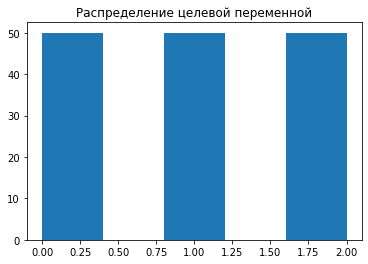

In [6]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=[iris.feature_names])[['sepal length (cm)', 'sepal width (cm)']]
data.columns = ['sepal_length', 'sepal_width']
data.reset_index()
variety = iris.target
plt.hist(variety, bins=5) 
plt.title("Распределение целевой переменной")
#целевая переменная распределенна равномерно. Вроде это не очень хорошо для дискриминационного анализа
plt.show()


In [8]:
accur = 0 
while accur <= 0.95:
    X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    lda.predict(X_test)
    accur = accuracy_score(y_test, lda.predict(X_test))
    
'''
Выбираю модель с точностью <= 95%
Исходя из значения коэффициентов все параметры вроде значимы
'''    
print(accur)
print("Coefficients \n", lda.coef_)
print("Means \n", lda.means_)


0.9736842105263158
Coefficients 
 [[-5.95245653  7.69331226]
 [ 1.90920613 -3.57125707]
 [ 3.68327713 -3.71340332]]
Means 
 [[5.025      3.42777778]
 [6.08378378 2.83513514]
 [6.55128205 2.98717949]]


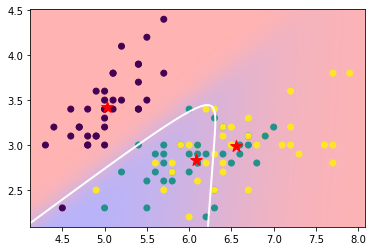

In [9]:
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')


nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)


plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)


plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')


In [ ]:
'''
Возможно из-за большой дисперсии  не получается однозначно разделить объекты для второго и третьего класса.
Наверно если увеличить количество признаков результат будет более точным
'''

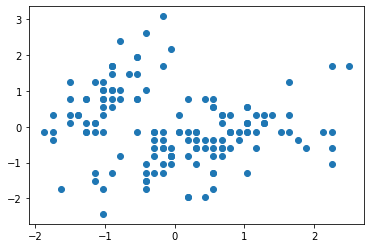

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1])



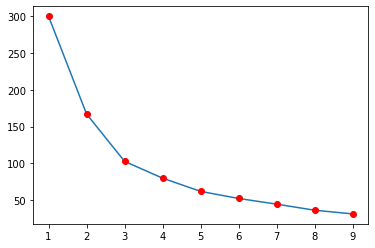

In [21]:
#график локтя

k_inertia = []
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [ ]:
'''
Исходя из графика думаю надо брать 3 кластера
'''

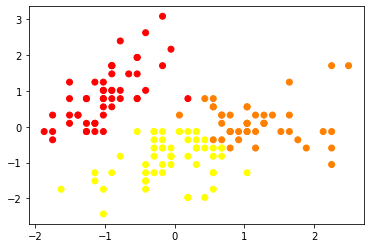

In [39]:
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='autumn', c=clusters)

In [ ]:
'''
для второго и третьего кластера всё так же могут быть ошибки на границе 
'''